In [1]:
import tensorflow as tf
import os

In [2]:
input_img_size =(128,128)
input_shape = (128,128,3)

In [3]:
tf_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.0,
)

In [4]:
train_gen = tf_generator.flow_from_directory(
    os.getcwd()+r"\cats_and_dogs_filtered\train",
    target_size=input_img_size,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32, #read32img per
    shuffle=True,
)

test_gen = tf_generator.flow_from_directory(
    os.getcwd()+r"\cats_and_dogs_filtered\validation",
    target_size=input_img_size,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32, #read32img per
    shuffle=True,
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


[0. 1.]


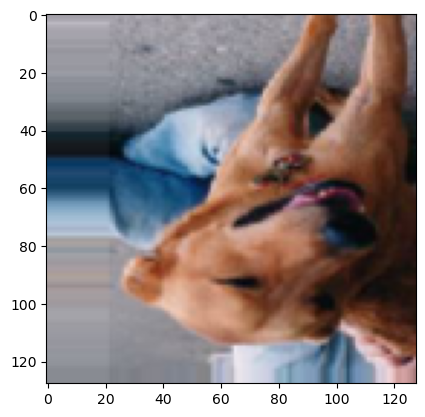

In [5]:
import matplotlib.pyplot as plt

test_label = None
test_img =None
for img,label in train_gen:
    test_label= label
    test_img = img
    
    break

print(test_label[0])
plt.imshow(test_img[0])

In [6]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),  # Conv Layer 1
    MaxPooling2D((2, 2)),                                           # Max Pooling Layer 1
    Conv2D(64, (3, 3), activation='relu'),                          # Conv Layer 2
    MaxPooling2D((2, 2)),                                           # Max Pooling Layer 2
    Flatten(),                                                      # Flatten Layer
    Dense(128, activation='relu'),                                  # Fully Connected Layer
    Dense(2, activation='softmax')      
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [7]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer =Adam(),
              metrics = ['accuracy'])

In [8]:
history = model.fit(train_gen,epochs=10,validation_data=test_gen,verbose=1)

Epoch 1/10
63/63 [==============================] - 90s 1s/step - loss: 0.7992 - accuracy: 0.5520 - val_loss: 0.7476 - val_accuracy: 0.5300
Epoch 2/10
63/63 [==============================] - 13s 213ms/step - loss: 0.6770 - accuracy: 0.5760 - val_loss: 0.6849 - val_accuracy: 0.5630
Epoch 3/10
63/63 [==============================] - 21s 340ms/step - loss: 0.6544 - accuracy: 0.6155 - val_loss: 0.6283 - val_accuracy: 0.6400
Epoch 4/10
63/63 [==============================] - 18s 274ms/step - loss: 0.6398 - accuracy: 0.6190 - val_loss: 0.6262 - val_accuracy: 0.6380
Epoch 5/10
63/63 [==============================] - 21s 335ms/step - loss: 0.6303 - accuracy: 0.6425 - val_loss: 0.6238 - val_accuracy: 0.6460
Epoch 6/10
63/63 [==============================] - 22s 352ms/step - loss: 0.6128 - accuracy: 0.6570 - val_loss: 0.6107 - val_accuracy: 0.6680
Epoch 7/10
63/63 [==============================] - 22s 348ms/step - loss: 0.6094 - accuracy: 0.6570 - val_loss: 0.6200 - val_accuracy: 0.6540
Ep

In [9]:
import json
class_names = train_gen.class_indices
print("class_naes :",class_names)
class_path = "sample_class_names.json"
with open(class_path,"w") as f:
    json.dump(class_names,f)

class_naes : {'cats': 0, 'dogs': 1}


## Save both architecture and weights

In [10]:
model_file = "my_tf_model.h5" 
model.save(model_file)

In [11]:
from tensorflow.keras.models import load_model
new_model = load_model(model_file)
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [12]:
weight_only_path = "weight_and_model/tf_model_weight_only.weight.h5"
archi_only_path = "weight_and_model/tf_model_architecture.json"

with open(archi_only_path,'w') as f:
    f.write(new_model.to_json())

new_model.save_weights(weight_only_path)